# Projet de masse de données et fouille de données

## Etape III : Fouille de données

Ce script fait suite directement au script de nettoyage des données (Etape II).

Il est nécessaire de lire les scripts précédents, pour comprendre ce qui est réalisé ici.

Dans ce script, nous appliquons des méthodes de fouilles de données, afin de concevoir des modèles de prédictions des données du Covid-19 aux Etats-Unis.

### Import des librairies

On commence par importer les librairies.

In [1]:
import pandas
import numpy
import matplotlib.pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from sklearn import preprocessing
import time
import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

### Import des données

Puis, on importe les données de notre jeu de données <b>nettoyé</b>, et on les "wrap" dans un DataFrame de Pandas.

In [2]:
data = pandas.read_csv("../data/cleaned_data.csv")
dataFrame = pandas.DataFrame(data)
dataFrame

,id,date,county,state,fips,cases,deaths
0,0,2020-01-21,Snohomish,Washington,53061,1,0
1,1,2020-01-22,Snohomish,Washington,53061,1,0
2,2,2020-01-23,Snohomish,Washington,53061,1,0
3,3,2020-01-24,Cook,Illinois,17031,1,0
4,4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...,...
775341,800432,2020-12-05,Sweetwater,Wyoming,56037,2098,10
775342,800433,2020-12-05,Teton,Wyoming,56039,1739,2
775343,800434,2020-12-05,Uinta,Wyoming,56041,1187,5
775344,800435,2020-12-05,Washakie,Wyoming,56043,519,8


### Fouille des données

#### Complétion des données

On commence par rendre les données plus complètes. En effet, pour les modèles de prédicion certaines données peuvent être ajoutées. 

On déduit le numéro de l'état (colonne "state") à partir de la colonne "fips", qui est le numéro du comté (colonne "county"). En effet, le numéro de l'état correspond aux deux premiers chiffres du numéro du comté. C'est le même principe que pour les départements et villes en France. Par exemple : Meuthe-Et-Moselle -> 54 et Nancy -> 54000.

In [3]:
completedDataFrame = dataFrame.copy()
completedDataFrame['state_fips'] = (completedDataFrame['fips'] / 1000).apply(int)
completedDataFrame = completedDataFrame.rename(columns = {'fips': 'county_fips'})
completedDataFrame = completedDataFrame[['id', 'date', 'county', 'county_fips', 'state', 'state_fips', 'cases' , 'deaths']]

In [4]:
completedDataFrame

,id,date,county,county_fips,state,state_fips,cases,deaths
0,0,2020-01-21,Snohomish,53061,Washington,53,1,0
1,1,2020-01-22,Snohomish,53061,Washington,53,1,0
2,2,2020-01-23,Snohomish,53061,Washington,53,1,0
3,3,2020-01-24,Cook,17031,Illinois,17,1,0
4,4,2020-01-24,Snohomish,53061,Washington,53,1,0
...,...,...,...,...,...,...,...,...
775341,800432,2020-12-05,Sweetwater,56037,Wyoming,56,2098,10
775342,800433,2020-12-05,Teton,56039,Wyoming,56,1739,2
775343,800434,2020-12-05,Uinta,56041,Wyoming,56,1187,5
775344,800435,2020-12-05,Washakie,56043,Wyoming,56,519,8


#### Sélection des données

Puis, on ne retient que les colonnes qui vont nous servir pour les modèles de prédiction. On retire la colonne "id", on retire la colonne "county" qui fait doublon à "county_fips", et qui est moins utile, et de même pour "state" qui fait doublon avec "state_fips" et qui est moins utile également.

In [5]:
reducedDataFrame = completedDataFrame.copy()
reducedDataFrame = reducedDataFrame.drop(columns = ['id', 'county', 'state'])

In [6]:
reducedDataFrame

,date,county_fips,state_fips,cases,deaths
0,2020-01-21,53061,53,1,0
1,2020-01-22,53061,53,1,0
2,2020-01-23,53061,53,1,0
3,2020-01-24,17031,17,1,0
4,2020-01-24,53061,53,1,0
...,...,...,...,...,...
775341,2020-12-05,56037,56,2098,10
775342,2020-12-05,56039,56,1739,2
775343,2020-12-05,56041,56,1187,5
775344,2020-12-05,56043,56,519,8


#### Première normalisation des données

Ensuite on efffectue une prmeière étape de normalisation des données. La normalisation étant une opération permettant de rendre un ensemble de données comparables entre elles.

On fait une première étape de normalisation donc pour la date en la trsanformant en entier.

In [7]:
normalizedDataFrame = reducedDataFrame.copy()
normalizedDataFrame.dtypes

date           object
county_fips     int64
state_fips      int64
cases           int64
deaths          int64
dtype: object

In [8]:
normalizedDataFrame = normalizedDataFrame.convert_dtypes()
normalizedDataFrame.dtypes

date           string
county_fips     Int64
state_fips      Int64
cases           Int64
deaths          Int64
dtype: object

In [9]:
normalizedDataFrame['date'] = pandas.to_datetime(normalizedDataFrame['date'])
normalizedDataFrame.dtypes

date           datetime64[ns]
county_fips             Int64
state_fips              Int64
cases                   Int64
deaths                  Int64
dtype: object

In [10]:
normalizedDataFrame['date'] = (normalizedDataFrame['date'].astype(numpy.int64) / 100000000000).apply(int)
normalizedDataFrame

,date,county_fips,state_fips,cases,deaths
0,15795648,53061,53,1,0
1,15796512,53061,53,1,0
2,15797376,53061,53,1,0
3,15798240,17031,17,1,0
4,15798240,53061,53,1,0
...,...,...,...,...,...
775341,16071264,56037,56,2098,10
775342,16071264,56039,56,1739,2
775343,16071264,56041,56,1187,5
775344,16071264,56043,56,519,8


#### Melange des données

On mélange les données pour éviter toute forme de biais dans notre fouille de données.

In [11]:
normalizedDataFrame = shuffle(normalizedDataFrame)
normalizedDataFrame

,date,county_fips,state_fips,cases,deaths
140961,15894144,26035,26,14,2
431271,15977088,6001,6,15475,224
149232,15896736,18183,18,28,2
351844,15954624,30031,30,695,1
168293,15901920,47113,47,164,2
...,...,...,...,...,...
723847,16057440,35045,35,4707,211
340842,15951168,54061,54,748,5
443045,15979680,48207,48,51,1
745817,16063488,36015,36,2872,34


#### Conception d'un modèle de prédiction du nombre de morts par régression

On commence la fouille de données avec une étude ayant pour finalité de pouvoir prédire le nombre de morts. Nos variables explicatives sont la date, le comté, l'état et le nombre de cas, et notre variable résultat à prédire est le nombre de morts.  Notre modèle utilisera comme méthode de fouille de données : la régression.

##### Division des données en deux ensembles : données pour les prédictions, et données pour le modèle

On prend les 100 premières lignes pour faire le sous-ensmeble des données qui servira à étudier les  justesse des prédictions du modèle que nosu allons faire. Et on prend les ligens restantes (un peu près 750 000) pour faire le sous-ensemble des données qui serviront à entrainer et à tester le modèle le modèle.

In [12]:
deathsModelDataFrame = normalizedDataFrame.copy()
deathsModelDataFrame 

,date,county_fips,state_fips,cases,deaths
140961,15894144,26035,26,14,2
431271,15977088,6001,6,15475,224
149232,15896736,18183,18,28,2
351844,15954624,30031,30,695,1
168293,15901920,47113,47,164,2
...,...,...,...,...,...
723847,16057440,35045,35,4707,211
340842,15951168,54061,54,748,5
443045,15979680,48207,48,51,1
745817,16063488,36015,36,2872,34


In [13]:
deathsModelForPredictionDataFrame = deathsModelDataFrame.iloc[:100,]
deathsModelForPredictionDataFrame 

,date,county_fips,state_fips,cases,deaths
140961,15894144,26035,26,14,2
431271,15977088,6001,6,15475,224
149232,15896736,18183,18,28,2
351844,15954624,30031,30,695,1
168293,15901920,47113,47,164,2
...,...,...,...,...,...
106420,15883776,22065,22,8,0
146804,15895872,26139,26,518,24
753843,16066080,13131,13,1016,31
201533,15912288,5059,5,34,0


In [14]:
deathsModelDataFrame = deathsModelDataFrame.iloc[100:,]
deathsModelDataFrame

,date,county_fips,state_fips,cases,deaths
21201,15855264,51085,51,5,0
301674,15940800,18111,18,100,11
598706,16022880,69120,69,2,0
726099,16058304,20093,20,304,8
250544,15926112,26075,26,2056,52
...,...,...,...,...,...
723847,16057440,35045,35,4707,211
340842,15951168,54061,54,748,5
443045,15979680,48207,48,51,1
745817,16063488,36015,36,2872,34


##### Division des deux nouveaux ensembles en variables explicatives ("date", "count_fips", "state_fips", "cases") et variable résultat ("deaths")

On sépare nos deux nouveaux ensembles avec les variables explicatives d'un côté ("date", "count_fips", "state_fips", "cases") et la variable résultat d'un autre côté ("deaths").

Note : 
- EV <=> Explanatory Variable <=> Variables Explicative
- RV <=> Result Variable <=> Variable Résultat

In [15]:
deathsModelForPredictionEVDataFrame = deathsModelForPredictionDataFrame.iloc[:,:4]
deathsModelForPredictionEVDataFrame

,date,county_fips,state_fips,cases
140961,15894144,26035,26,14
431271,15977088,6001,6,15475
149232,15896736,18183,18,28
351844,15954624,30031,30,695
168293,15901920,47113,47,164
...,...,...,...,...
106420,15883776,22065,22,8
146804,15895872,26139,26,518
753843,16066080,13131,13,1016
201533,15912288,5059,5,34


In [16]:
deathsModelForPredictionRVDataFrame = deathsModelForPredictionDataFrame.iloc[:,4:]
deathsModelForPredictionRVDataFrame

,deaths
140961,2
431271,224
149232,2
351844,1
168293,2
...,...
106420,0
146804,24
753843,31
201533,0


In [17]:
deathsModelEVDataFrame = deathsModelDataFrame.iloc[:,:4]
deathsModelEVDataFrame

,date,county_fips,state_fips,cases
21201,15855264,51085,51,5
301674,15940800,18111,18,100
598706,16022880,69120,69,2
726099,16058304,20093,20,304
250544,15926112,26075,26,2056
...,...,...,...,...
723847,16057440,35045,35,4707
340842,15951168,54061,54,748
443045,15979680,48207,48,51
745817,16063488,36015,36,2872


In [18]:
deathsModelRVDataFrame = deathsModelDataFrame.iloc[:,4:]
deathsModelRVDataFrame

,deaths
21201,0
301674,11
598706,0
726099,8
250544,52
...,...
723847,211
340842,5
443045,1
745817,34


###### Division en deux des ensembles des données du modèle : données d'entrainement et données de test

On sépare les ensembles du modèle : des variables explicatives et de la variable de résultat en ensemble d'entrainement et de test. 25% des lignes vont pour les tests, et 75% vont pour l'entrainement.

In [19]:
deathsModelEVTrainDataFrame, deathsModelEVTestDataFrame, deathsModelRVTrainDataFrame, deathsModelRVTestDataFrame = train_test_split(deathsModelEVDataFrame, deathsModelRVDataFrame, test_size=0.25, random_state=1)

In [20]:
deathsModelEVTrainDataFrame

,date,county_fips,state_fips,cases
661890,16040160,48073,48,1647
532851,16004736,37003,37,483
345389,15952896,27065,27,19
23949,15856992,13317,13,2
653086,16038432,1015,1,4689
...,...,...,...,...
129131,15890688,20119,20,21
503291,15996960,13107,13,879
342601,15952032,31027,31,19
220215,15917472,20133,20,4


In [21]:
deathsModelRVTrainDataFrame

,deaths
661890,38
532851,5
345389,1
23949,0
653086,62
...,...
129131,0
503291,26
342601,0
220215,0


In [22]:
deathsModelEVTestDataFrame

,date,county_fips,state_fips,cases
94174,15880320,5021,5,3
130323,15890688,42057,42,8
335885,15950304,22021,22,133
308717,15942528,31097,31,7
79193,15875136,39059,39,15
...,...,...,...,...
121213,15888096,33011,33,1308
616770,16028064,26155,26,605
523869,16002144,42079,42,3981
100176,15882048,13237,13,40


In [23]:
deathsModelRVTestDataFrame

,deaths
94174,0
130323,0
335885,1
308717,0
79193,0
...,...
121213,48
616770,33
523869,189
100176,5


##### Seconde normalisation des données

On effectue une seconde normalisation des données. Toutes les données sont déjà du même type : entier (première normalisation), ce qu'il reste à faire ici, c'est de faire en sorte que les données soient de même ordre de grandeur.

In [24]:
scalerExplanatoryVariable = preprocessing.StandardScaler()
scalerResultVariable = preprocessing.StandardScaler()

In [25]:
deathsModelEVTrainDataFrame = pandas.DataFrame(scalerExplanatoryVariable.fit_transform(deathsModelEVTrainDataFrame), 
                                               columns = deathsModelEVTrainDataFrame.columns)
deathsModelEVTrainDataFrame

,date,county_fips,state_fips,cases
0,1.207798,1.157230,1.160509,0.012588
1,0.650633,0.434050,0.441079,-0.143608
2,-0.164730,-0.215180,-0.212948,-0.205871
3,-1.673152,-1.113309,-1.128586,-0.208153
4,1.180619,-1.916973,-1.913418,0.420789
...,...,...,...,...
581429,-1.143166,-0.668948,-0.670767,-0.205603
581430,0.528328,-1.127028,-1.128586,-0.090469
581431,-0.178319,0.043650,0.048663,-0.205871
581432,-0.721895,-0.668033,-0.670767,-0.207884


In [26]:
deathsModelRVTrainDataFrame = pandas.DataFrame(scalerResultVariable.fit_transform(deathsModelRVTrainDataFrame))
deathsModelRVTrainDataFrame

,0
0,-0.019810
1,-0.178891
2,-0.198173
3,-0.202994
4,0.095886
...,...
581429,-0.202994
581430,-0.077657
581431,-0.202994
581432,-0.202994


In [27]:
deathsModelEVTestDataFrame = pandas.DataFrame(scalerExplanatoryVariable.transform(deathsModelEVTestDataFrame),
                                              columns = deathsModelEVTestDataFrame.columns)
deathsModelEVTestDataFrame

,date,county_fips,state_fips,cases
0,-1.306238,-1.655270,-1.651807,-0.208018
1,-1.143166,0.764217,0.768093,-0.207347
2,-0.205498,-0.544694,-0.539961,-0.190574
3,-0.327803,0.048223,0.048663,-0.207482
4,-1.387775,0.568364,0.571885,-0.206408
...,...,...,...,...
193807,-1.183934,0.173260,0.179469,-0.032902
193808,1.017546,-0.274628,-0.278350,-0.127237
193809,0.609865,0.765654,0.768093,0.325784
193810,-1.279060,-1.118535,-1.128586,-0.203053


In [28]:
deathsModelRVTestDataFrame = pandas.DataFrame(scalerResultVariable.transform(deathsModelRVTestDataFrame))
deathsModelRVTestDataFrame

,0
0,-0.202994
1,-0.202994
2,-0.198173
3,-0.202994
4,-0.202994
...,...
193807,0.028397
193808,-0.043913
193809,0.708107
193810,-0.178891


##### Création de l'architecture du modèle

On declare la fonction de création de notre modèle. On choisi de faire 3 niveaux de couches de neurones pour l'entrainement du modèle : 32, 16, 4. 

In [29]:
def createDeathsModel():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

###### Création et entrainement du modèle

On crée notre modèle, et on le paramètre, puis on l'entraine.
On règle le taux d'apprentissage à 1% (0.01 <=> 1e-2) (learning_rate), on l'entraine sur 250 périodes / itérations (epochs), et on divise les données en paquets de 512 lignes / observations (batch_size). L'entrainement prend un certain temps, étant donné la volumétrie des données.

In [30]:
deathsModel = createDeathsModel() 
deathsModel.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [31]:
deathsModelHistory = deathsModel.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                     batch_size = 512,
                                     epochs = 250,
                                     validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.3097 - accuracy: 0.0000e+00 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 2/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.2192 - accuracy: 0.0000e+00 - val_loss: 0.2092 - val_accuracy: 0.0000e+00
Epoch 3/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.1980 - accuracy: 0.0000e+00 - val_loss: 0.1897 - val_accuracy: 0.0000e+00
Epoch 4/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.1767 - accuracy: 0.0000e+00 - val_loss: 0.1701 - val_accuracy: 0.0000e+00
Epoch 5/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1605 - accuracy: 0.0000e+00 - val_loss: 0.1548 - val_accuracy: 0.0000e+00
Epoch 6/250
1136/1136 [==============================] - 3s 2ms/step - loss: 0.1495 - accuracy: 0.0000e+00 - val_loss: 0.1487 - val_accuracy: 0.0000e+00
Epoch 7/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.143

1136/1136 [==============================] - 2s 2ms/step - loss: 0.1061 - accuracy: 0.0000e+00 - val_loss: 0.1292 - val_accuracy: 0.0000e+00
Epoch 108/250
1136/1136 [==============================] - 3s 2ms/step - loss: 0.1070 - accuracy: 0.0000e+00 - val_loss: 0.1112 - val_accuracy: 0.0000e+00
Epoch 109/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1074 - accuracy: 0.0000e+00 - val_loss: 0.1118 - val_accuracy: 0.0000e+00
Epoch 110/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1059 - accuracy: 0.0000e+00 - val_loss: 0.1132 - val_accuracy: 0.0000e+00
Epoch 111/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.1057 - accuracy: 0.0000e+00 - val_loss: 0.1058 - val_accuracy: 0.0000e+00
Epoch 112/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1052 - accuracy: 0.0000e+00 - val_loss: 0.1071 - val_accuracy: 0.0000e+00
Epoch 113/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.104

Epoch 160/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0903 - accuracy: 0.0000e+00 - val_loss: 0.0965 - val_accuracy: 0.0000e+00
Epoch 161/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0910 - accuracy: 0.0000e+00 - val_loss: 0.0943 - val_accuracy: 0.0000e+00
Epoch 162/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0891 - accuracy: 0.0000e+00 - val_loss: 0.0943 - val_accuracy: 0.0000e+00
Epoch 163/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0878 - accuracy: 0.0000e+00 - val_loss: 0.1012 - val_accuracy: 0.0000e+00
Epoch 164/250
1136/1136 [==============================] - 4s 3ms/step - loss: 0.0895 - accuracy: 0.0000e+00 - val_loss: 0.0874 - val_accuracy: 0.0000e+00
Epoch 165/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0980 - accuracy: 0.0000e+00 - val_loss: 0.0897 - val_accuracy: 0.0000e+00
Epoch 166/250
1136/1136 [==============================] - 4s 3ms/step

Epoch 213/250
1136/1136 [==============================] - 3s 2ms/step - loss: 0.0718 - accuracy: 0.0000e+00 - val_loss: 0.0684 - val_accuracy: 0.0000e+00
Epoch 214/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0716 - accuracy: 0.0000e+00 - val_loss: 0.0766 - val_accuracy: 0.0000e+00
Epoch 215/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0713 - accuracy: 0.0000e+00 - val_loss: 0.0759 - val_accuracy: 0.0000e+00
Epoch 216/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0722 - accuracy: 0.0000e+00 - val_loss: 0.0709 - val_accuracy: 0.0000e+00
Epoch 217/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0713 - accuracy: 0.0000e+00 - val_loss: 0.0689 - val_accuracy: 0.0000e+00
Epoch 218/250
1136/1136 [==============================] - 3s 3ms/step - loss: 0.0696 - accuracy: 0.0000e+00 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 219/250
1136/1136 [==============================] - 2s 2ms/step

##### Test manuel de la justesse de prédiction du modèle

On fait un test de prédiction manuel pour évaluer la justesse de prédiction de notre modèle. Et pour cela, on utilise les données que nous avions isolé au départ de l'étude du modèle. L'idée est que plus "predicted_deaths" est similaire à "deaths", plus le modèle est bon. En faisant plusieurs itérations de l'entrainement précédent du modèle en changeant le nombre d'époques (50 à 250), et en refaissant à chaque fois ensuite ce test de prédiction du modèle, on trouve que les prédictions sont parfois très proches, et d'autres fois un peu moins proche, mais globalement les tendances sont respectées.

<b>Pour conclure : l'ordre de grandeur est respecté par les prédictions, mais ces dernières ne sont pas exactes.</b>

In [32]:
deathsModelPredictions = deathsModel.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))

In [33]:
comparisonResultAndPredictionDataFrame = deathsModelForPredictionRVDataFrame.copy()

In [34]:
comparisonResultAndPredictionDataFrame['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions)

In [68]:
print(comparisonResultAndPredictionDataFrame.to_string())

        deaths  predicted_deaths
140961       2          3.659561
431271     224        307.060516
149232       2          6.252026
351844       1          6.194191
168293       2         10.629992
159079       0         10.629992
140256      15          7.723896
663777       1          8.894039
366356    4857       4985.018555
207301       8         10.629992
13475        0         10.629992
648414       6         10.629992
335810     230        167.354385
458682       0         10.629992
602385       4         10.629992
244525       0          2.816490
133476       0         10.629992
228168       0         10.629992
423886       1         10.629992
4062         0          3.216820
518193      21         10.629992
3427         0         -2.282043
361154       0          7.737877
758664      10         10.629992
620552      35        142.435623
562917       1          6.203442
622789       0          5.424751
163377       0          9.489899
524531      14         10.629992
26684     

##### Etude du modèle à partir de graphique

On affiche sur des graphiques les résultats enregistrés par le modèle à chaque époque : résultats d'entrainement et de test. On oberve que le loss, la distance entre le résultat prévu et celui prédit, n'est pas stable, le modèle manque d'exactitude, ce qui rappelle notre observation au test manuel précédent, le modèle pourrait donc être amélioré. 

<b>Pour conclure : pareil que pour le test manuel, l'ordre de grandeur est respecté par les prédictions, mais ces dernières ne sont pas exactes.</b>

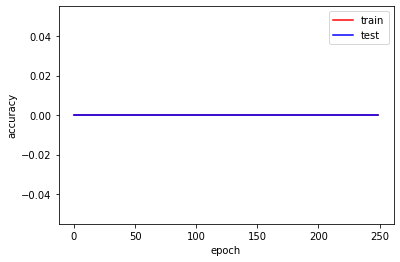

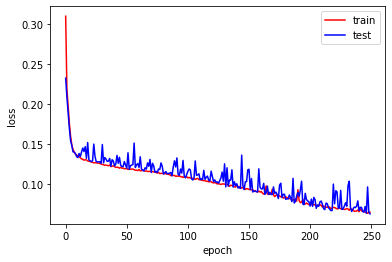

<Figure size 432x288 with 0 Axes>

In [36]:
epochsRange = range(250)

matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

##### Création d'un deuxième modèle avec plus de neurones, puis entrainement, et test 

On tente un deuxième modèle avec 6 niveaux de couches de neurones pour l'entrainement : 128, 64, 32, 16, 8, et 4. On observe que le modèle semble avoir des résultats du même ordre que le modèle précédent (cela se voit en comparant les tests manuels et en comparant les résultats du modèle affichés sur les graphiques). Mais ces résultats semblent quand même un peu meilleurs, par exemple le loss de la dernière époque d'apprentissage est souvent plus faible que celui pour le premier modèle (on le rappelle on cherche à minimer loss car il est la distance entre les résultats attendus et ceux prédits). 

<b>Pour conclure : ce deuixème modèle semble à peine plus concluant que le premier modèle.</b>

In [37]:
def createDeathsModel():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(128, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(64, activation="relu")(h)
    h = keras.layers.Dense(32, activation="relu")(h)
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(8, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [38]:
deathsModel2 = createDeathsModel2() 
deathsModel2.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [39]:
deathsModelHistory2 = deathsModel2.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 512,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
1136/1136 [==============================] - 6s 5ms/step - loss: 0.3004 - accuracy: 0.0000e+00 - val_loss: 0.2244 - val_accuracy: 0.0000e+00
Epoch 2/250
1136/1136 [==============================] - 4s 4ms/step - loss: 0.1995 - accuracy: 0.0000e+00 - val_loss: 0.1806 - val_accuracy: 0.0000e+00
Epoch 3/250
1136/1136 [==============================] - 5s 4ms/step - loss: 0.1671 - accuracy: 0.0000e+00 - val_loss: 0.2259 - val_accuracy: 0.0000e+00
Epoch 4/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.1518 - accuracy: 0.0000e+00 - val_loss: 0.1622 - val_accuracy: 0.0000e+00
Epoch 5/250
1136/1136 [==============================] - 5s 4ms/step - loss: 0.1392 - accuracy: 0.0000e+00 - val_loss: 0.1699 - val_accuracy: 0.0000e+00
Epoch 6/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.1354 - accuracy: 0.0000e+00 - val_loss: 0.1414 - val_accuracy: 0.0000e+00
Epoch 7/250
1136/1136 [==============================] - 4s 4ms/step - loss: 0.131

1136/1136 [==============================] - 4s 4ms/step - loss: 0.0400 - accuracy: 0.0000e+00 - val_loss: 0.0361 - val_accuracy: 0.0000e+00
Epoch 108/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.0387 - accuracy: 0.0000e+00 - val_loss: 0.0368 - val_accuracy: 0.0000e+00
Epoch 109/250
1136/1136 [==============================] - 5s 4ms/step - loss: 0.0363 - accuracy: 0.0000e+00 - val_loss: 0.0352 - val_accuracy: 0.0000e+00
Epoch 110/250
1136/1136 [==============================] - 5s 4ms/step - loss: 0.0334 - accuracy: 0.0000e+00 - val_loss: 0.0335 - val_accuracy: 0.0000e+00
Epoch 111/250
1136/1136 [==============================] - 5s 4ms/step - loss: 0.0354 - accuracy: 0.0000e+00 - val_loss: 0.0344 - val_accuracy: 0.0000e+00
Epoch 112/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.0336 - accuracy: 0.0000e+00 - val_loss: 0.0504 - val_accuracy: 0.0000e+00
Epoch 113/250
1136/1136 [==============================] - 5s 4ms/step - loss: 0.033

Epoch 160/250
1136/1136 [==============================] - 4s 4ms/step - loss: 0.0259 - accuracy: 0.0000e+00 - val_loss: 0.0254 - val_accuracy: 0.0000e+00
Epoch 161/250
1136/1136 [==============================] - 6s 5ms/step - loss: 0.0264 - accuracy: 0.0000e+00 - val_loss: 0.0261 - val_accuracy: 0.0000e+00
Epoch 162/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.0273 - accuracy: 0.0000e+00 - val_loss: 0.0261 - val_accuracy: 0.0000e+00
Epoch 163/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.0260 - accuracy: 0.0000e+00 - val_loss: 0.0295 - val_accuracy: 0.0000e+00
Epoch 164/250
1136/1136 [==============================] - 6s 5ms/step - loss: 0.0255 - accuracy: 0.0000e+00 - val_loss: 0.0277 - val_accuracy: 0.0000e+00
Epoch 165/250
1136/1136 [==============================] - 5s 4ms/step - loss: 0.0371 - accuracy: 0.0000e+00 - val_loss: 0.0934 - val_accuracy: 0.0000e+00
Epoch 166/250
1136/1136 [==============================] - 4s 4ms/step

Epoch 213/250
1136/1136 [==============================] - 5s 4ms/step - loss: 0.0228 - accuracy: 0.0000e+00 - val_loss: 0.0244 - val_accuracy: 0.0000e+00
Epoch 214/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.0229 - accuracy: 0.0000e+00 - val_loss: 0.0241 - val_accuracy: 0.0000e+00
Epoch 215/250
1136/1136 [==============================] - 6s 5ms/step - loss: 0.0228 - accuracy: 0.0000e+00 - val_loss: 0.0233 - val_accuracy: 0.0000e+00
Epoch 216/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.0230 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_accuracy: 0.0000e+00
Epoch 217/250
1136/1136 [==============================] - 5s 5ms/step - loss: 0.0228 - accuracy: 0.0000e+00 - val_loss: 0.0235 - val_accuracy: 0.0000e+00
Epoch 218/250
1136/1136 [==============================] - 6s 5ms/step - loss: 0.0225 - accuracy: 0.0000e+00 - val_loss: 0.0240 - val_accuracy: 0.0000e+00
Epoch 219/250
1136/1136 [==============================] - 5s 4ms/step

In [67]:
deathsModelPredictions2 = deathsModel2.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame2 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame2['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions2)
print(comparisonResultAndPredictionDataFrame2.to_string())

        deaths  predicted_deaths
140961       2          4.096218
431271     224        248.678925
149232       2          3.095696
351844       1         16.113430
168293       2          2.439232
159079       0          9.434452
140256      15         16.410833
663777       1          1.362087
366356    4857       4751.839844
207301       8          5.728687
13475        0          1.033280
648414       6         27.599886
335810     230        161.059204
458682       0          2.736237
602385       4          7.777752
244525       0          8.036823
133476       0          1.303318
228168       0          3.100209
423886       1          4.549992
4062         0         -4.296684
518193      21         20.438707
3427         0          4.162453
361154       0          0.855232
758664      10         27.780272
620552      35         71.055382
562917       1          4.172802
622789       0          8.162361
163377       0         15.462156
524531      14         15.729698
26684     

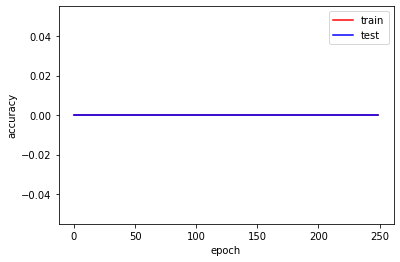

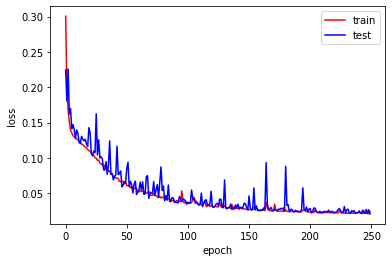

<Figure size 432x288 with 0 Axes>

In [49]:
epochsRange2 = range(250)

matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un troisème modèle avec plus de paquets, puis entrainement, et test

On tente un troisième modèle avec la même architecture de neurones que le premier modèle, mais en faisant de plus gros paquets de 2048 lignes / observations. On peut voir que le loss final obtenu à la dernière époque est souvent supérieur aux loss des modèles précédents, cela est donc moins intéressant. On peut voir aussi que les prédictions du test manuel sont moins précises que celles des modèles précédents. 

<b>Pour conclure : ce modèle semble moins concluant que les deux modèles précédents.</b>

In [42]:
def createDeathsModel3():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [43]:
deathsModel3 = createDeathsModel3() 
deathsModel3.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [44]:
deathsModelHistory3 = deathsModel3.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 2048,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
2272/2272 [==============================] - 6s 3ms/step - loss: 0.2379 - accuracy: 0.0000e+00 - val_loss: 0.2064 - val_accuracy: 0.0000e+00
Epoch 2/250
2272/2272 [==============================] - 6s 3ms/step - loss: 0.1873 - accuracy: 0.0000e+00 - val_loss: 0.1779 - val_accuracy: 0.0000e+00
Epoch 3/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.1651 - accuracy: 0.0000e+00 - val_loss: 0.1563 - val_accuracy: 0.0000e+00
Epoch 4/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.1516 - accuracy: 0.0000e+00 - val_loss: 0.1453 - val_accuracy: 0.0000e+00
Epoch 5/250
2272/2272 [==============================] - 7s 3ms/step - loss: 0.1447 - accuracy: 0.0000e+00 - val_loss: 0.1392 - val_accuracy: 0.0000e+00
Epoch 6/250
2272/2272 [==============================] - 6s 3ms/step - loss: 0.1407 - accuracy: 0.0000e+00 - val_loss: 0.1381 - val_accuracy: 0.0000e+00
Epoch 7/250
2272/2272 [==============================] - 6s 3ms/step - loss: 0.137

2272/2272 [==============================] - 7s 3ms/step - loss: 0.0881 - accuracy: 0.0000e+00 - val_loss: 0.0949 - val_accuracy: 0.0000e+00
Epoch 108/250
2272/2272 [==============================] - 7s 3ms/step - loss: 0.0876 - accuracy: 0.0000e+00 - val_loss: 0.1077 - val_accuracy: 0.0000e+00
Epoch 109/250
2272/2272 [==============================] - 7s 3ms/step - loss: 0.0870 - accuracy: 0.0000e+00 - val_loss: 0.0869 - val_accuracy: 0.0000e+00
Epoch 110/250
2272/2272 [==============================] - 7s 3ms/step - loss: 0.0862 - accuracy: 0.0000e+00 - val_loss: 0.0862 - val_accuracy: 0.0000e+00
Epoch 111/250
2272/2272 [==============================] - 7s 3ms/step - loss: 0.0850 - accuracy: 0.0000e+00 - val_loss: 0.0915 - val_accuracy: 0.0000e+00
Epoch 112/250
2272/2272 [==============================] - 7s 3ms/step - loss: 0.0850 - accuracy: 0.0000e+00 - val_loss: 0.1255 - val_accuracy: 0.0000e+00
Epoch 113/250
2272/2272 [==============================] - 7s 3ms/step - loss: 0.084

Epoch 160/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.0674 - accuracy: 0.0000e+00 - val_loss: 0.0717 - val_accuracy: 0.0000e+00
Epoch 161/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.0674 - accuracy: 0.0000e+00 - val_loss: 0.0694 - val_accuracy: 0.0000e+00
Epoch 162/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.0670 - accuracy: 0.0000e+00 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 163/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.0675 - accuracy: 0.0000e+00 - val_loss: 0.0746 - val_accuracy: 0.0000e+00
Epoch 164/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.0674 - accuracy: 0.0000e+00 - val_loss: 0.0735 - val_accuracy: 0.0000e+00
Epoch 165/250
2272/2272 [==============================] - 6s 3ms/step - loss: 0.0665 - accuracy: 0.0000e+00 - val_loss: 0.0742 - val_accuracy: 0.0000e+00
Epoch 166/250
2272/2272 [==============================] - 7s 3ms/step

Epoch 213/250
2272/2272 [==============================] - 6s 2ms/step - loss: 0.0540 - accuracy: 0.0000e+00 - val_loss: 0.0765 - val_accuracy: 0.0000e+00
Epoch 214/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.0538 - accuracy: 0.0000e+00 - val_loss: 0.0533 - val_accuracy: 0.0000e+00
Epoch 215/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.0536 - accuracy: 0.0000e+00 - val_loss: 0.0811 - val_accuracy: 0.0000e+00
Epoch 216/250
2272/2272 [==============================] - 5s 2ms/step - loss: 0.0533 - accuracy: 0.0000e+00 - val_loss: 0.0678 - val_accuracy: 0.0000e+00
Epoch 217/250
2272/2272 [==============================] - 6s 3ms/step - loss: 0.0525 - accuracy: 0.0000e+00 - val_loss: 0.0547 - val_accuracy: 0.0000e+00
Epoch 218/250
2272/2272 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - val_loss: 0.0522 - val_accuracy: 0.0000e+00
Epoch 219/250
2272/2272 [==============================] - 6s 3ms/step

In [69]:
deathsModelPredictions3 = deathsModel3.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame3 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame3['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions3)
print(comparisonResultAndPredictionDataFrame3.to_string())

        deaths  predicted_deaths
140961       2         10.872911
431271     224        315.356659
149232       2          1.970543
351844       1         19.048742
168293       2          2.492966
159079       0         -2.651344
140256      15          5.342484
663777       1          1.895069
366356    4857       4010.350098
207301       8          2.489010
13475        0         -3.822902
648414       6         37.339848
335810     230        154.458771
458682       0         -1.205543
602385       4          1.097164
244525       0          8.294476
133476       0         -0.488651
228168       0         -0.536228
423886       1         -1.328594
4062         0          7.678623
518193      21          8.956814
3427         0         10.442232
361154       0         -5.743450
758664      10         35.569901
620552      35        121.719704
562917       1          3.389786
622789       0          9.881378
163377       0         -1.506248
524531      14          6.384411
26684     

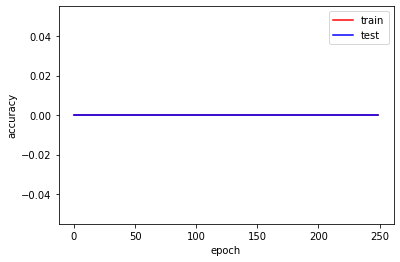

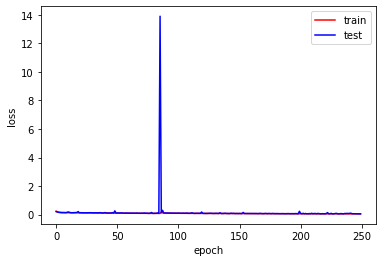

<Figure size 432x288 with 0 Axes>

In [50]:
epochsRange3 = range(250)

matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un quatrième modèle avec un taux d'apprentissage de 5%, puis entrainement, et test

On tente un quatrième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 5% (<=> 0.5 <=> 5e-1) et un nombre d'époques de 50 (suffissant pour ce qu'on veut démontrer). On peut voir que les résultats du modèle durant le test manuel sont très mauvais, le modèle semble toujours donner les mêmes résultats pour des nouvelles données. Du fait du taux d'apprentissage 5%, il y a eu du sur-apprentissage (overfitting).

<b>Pour conclure : le taux d'apprentissage a un fort impact sur le modèle, et ici un taux de 5% a produit du sur-apprentissage, le modèle est de fait très mauvais avec de nouvelles données, ce le pire modèle parmi autres faits jusqu'à présent.</b>

In [167]:
def createDeathsModel4():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [168]:
deathsModel4 = createDeathsModel4() 
deathsModel4.compile(optimizer = keras.optimizers.SGD(learning_rate=5e-1), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [169]:
deathsModelHistory4 = deathsModel4.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 50,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/50
2308/2308 [==============================] - 4s 2ms/step - loss: 25.7815 - accuracy: 0.0000e+00 - val_loss: 1.0116 - val_accuracy: 0.0000e+00
Epoch 2/50
2308/2308 [==============================] - 3s 1ms/step - loss: 1.0039 - accuracy: 0.0000e+00 - val_loss: 1.0409 - val_accuracy: 0.0000e+00
Epoch 3/50
2308/2308 [==============================] - 3s 1ms/step - loss: 1.0042 - accuracy: 0.0000e+00 - val_loss: 1.0093 - val_accuracy: 0.0000e+00
Epoch 4/50
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0044 - accuracy: 0.0000e+00 - val_loss: 1.0601 - val_accuracy: 0.0000e+00
Epoch 5/50
2308/2308 [==============================] - 3s 1ms/step - loss: 1.0039 - accuracy: 0.0000e+00 - val_loss: 1.0214 - val_accuracy: 0.0000e+00
Epoch 6/50
2308/2308 [==============================] - 3s 1ms/step - loss: 1.0039 - accuracy: 0.0000e+00 - val_loss: 1.0054 - val_accuracy: 0.0000e+00
Epoch 7/50
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0040 - ac

In [170]:
deathsModelPredictions4 = deathsModel4.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame4 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame4['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions4)
print(comparisonResultAndPredictionDataFrame4.to_string())

        deaths  predicted_deaths
140961       2         30.999992
431271     224         30.999992
149232       2         30.999992
351844       1         30.999992
168293       2         30.999992
159079       0         30.999992
140256      15         30.999992
663777       1         30.999992
366356    4857         30.999992
207301       8         30.999992
13475        0         30.999992
648414       6         30.999992
335810     230         30.999992
458682       0         30.999992
602385       4         30.999992
244525       0         30.999992
133476       0         30.999992
228168       0         30.999992
423886       1         30.999992
4062         0         30.999992
518193      21         30.999992
3427         0         30.999992
361154       0         30.999992
758664      10         30.999992
620552      35         30.999992
562917       1         30.999992
622789       0         30.999992
163377       0         30.999992
524531      14         30.999992
26684     

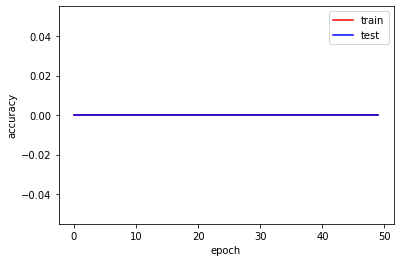

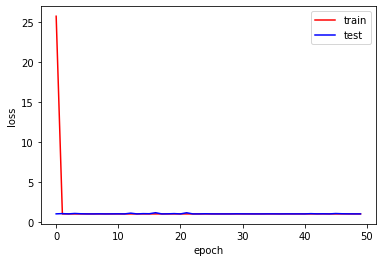

<Figure size 432x288 with 0 Axes>

In [171]:
epochsRange4 = range(50)

matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un cinquième modèle avec un taux d'apprentissage de 0.1%, puis entrainement, et test

On tente un cinquième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 0.1% (<=> 0.001 <=> 1e-3).  On peut voir que le modèle semble plus stable, plus exact dans ces prédictions plus que le loss est plus stable, et converge d'ailleurs vers des valeurs plus faibles que les modèles précédents, cela est intéressant.

<b>Pour conclure : ce cinquième modèle est meilleur et plus concluant que les quatres modèles précédents.</b>

In [160]:
def createDeathsModel5():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [161]:
deathsModel5 = createDeathsModel5() 
deathsModel5.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-3), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [162]:
deathsModelHistory5 = deathsModel5.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
2308/2308 [==============================] - 5s 2ms/step - loss: 0.2980 - accuracy: 0.0000e+00 - val_loss: 0.2587 - val_accuracy: 0.0000e+00
Epoch 2/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.2441 - accuracy: 0.0000e+00 - val_loss: 0.2406 - val_accuracy: 0.0000e+00
Epoch 3/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2323 - accuracy: 0.0000e+00 - val_loss: 0.2303 - val_accuracy: 0.0000e+00
Epoch 4/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2242 - accuracy: 0.0000e+00 - val_loss: 0.2233 - val_accuracy: 0.0000e+00
Epoch 5/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2170 - accuracy: 0.0000e+00 - val_loss: 0.2155 - val_accuracy: 0.0000e+00
Epoch 6/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.2102 - accuracy: 0.0000e+00 - val_loss: 0.2087 - val_accuracy: 0.0000e+00
Epoch 7/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.203

2308/2308 [==============================] - 4s 2ms/step - loss: 0.1230 - accuracy: 0.0000e+00 - val_loss: 0.1265 - val_accuracy: 0.0000e+00
Epoch 108/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1226 - accuracy: 0.0000e+00 - val_loss: 0.1289 - val_accuracy: 0.0000e+00
Epoch 109/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.0000e+00 - val_loss: 0.1270 - val_accuracy: 0.0000e+00
Epoch 110/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.1220 - accuracy: 0.0000e+00 - val_loss: 0.1275 - val_accuracy: 0.0000e+00
Epoch 111/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1225 - accuracy: 0.0000e+00 - val_loss: 0.1274 - val_accuracy: 0.0000e+00
Epoch 112/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.0000e+00 - val_loss: 0.1258 - val_accuracy: 0.0000e+00
Epoch 113/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.122

Epoch 160/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1174 - accuracy: 0.0000e+00 - val_loss: 0.1212 - val_accuracy: 0.0000e+00
Epoch 161/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1173 - accuracy: 0.0000e+00 - val_loss: 0.1210 - val_accuracy: 0.0000e+00
Epoch 162/250
2308/2308 [==============================] - 3s 2ms/step - loss: 0.1168 - accuracy: 0.0000e+00 - val_loss: 0.1220 - val_accuracy: 0.0000e+00
Epoch 163/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1167 - accuracy: 0.0000e+00 - val_loss: 0.1243 - val_accuracy: 0.0000e+00
Epoch 164/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1170 - accuracy: 0.0000e+00 - val_loss: 0.1227 - val_accuracy: 0.0000e+00
Epoch 165/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.1170 - accuracy: 0.0000e+00 - val_loss: 0.1213 - val_accuracy: 0.0000e+00
Epoch 166/250
2308/2308 [==============================] - 4s 2ms/step

Epoch 213/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.1115 - accuracy: 0.0000e+00 - val_loss: 0.1211 - val_accuracy: 0.0000e+00
Epoch 214/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1112 - accuracy: 0.0000e+00 - val_loss: 0.1177 - val_accuracy: 0.0000e+00
Epoch 215/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.1111 - accuracy: 0.0000e+00 - val_loss: 0.1180 - val_accuracy: 0.0000e+00
Epoch 216/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.0000e+00 - val_loss: 0.1439 - val_accuracy: 0.0000e+00
Epoch 217/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1110 - accuracy: 0.0000e+00 - val_loss: 0.1167 - val_accuracy: 0.0000e+00
Epoch 218/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.0000e+00 - val_loss: 0.1199 - val_accuracy: 0.0000e+00
Epoch 219/250
2308/2308 [==============================] - 4s 2ms/step

In [164]:
deathsModelPredictions5 = deathsModel5.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame5 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame5['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions5)
print(comparisonResultAndPredictionDataFrame5.to_string())

        deaths  predicted_deaths
140961       2          2.509430
431271     224        503.846771
149232       2          5.730125
351844       1          7.360664
168293       2          4.302784
159079       0          0.970154
140256      15         19.495415
663777       1         12.598984
366356    4857       4378.785156
207301       8          7.929031
13475        0          3.544422
648414       6         33.748779
335810     230        209.819504
458682       0          5.285717
602385       4          4.031551
244525       0         -5.323956
133476       0         -0.808353
228168       0          0.212132
423886       1          3.233467
4062         0        -11.591278
518193      21         13.632870
3427         0          9.570950
361154       0         -2.856132
758664      10         52.386635
620552      35        152.580841
562917       1          8.633602
622789       0          1.435650
163377       0         10.600689
524531      14          6.723637
26684     

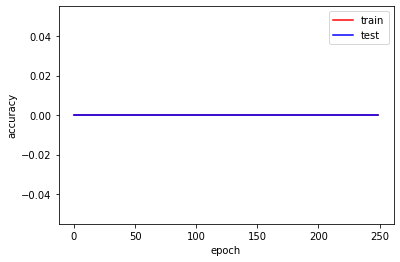

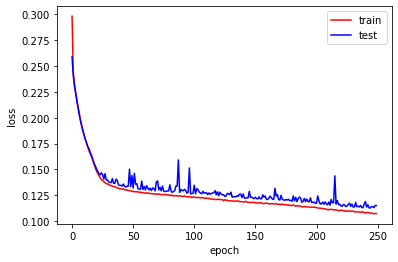

<Figure size 432x288 with 0 Axes>

In [165]:
epochsRange5 = range(250)

matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un sixième modèle avec un taux d'apprentissage de 0.001%, puis entrainement, et test

On tente un cinquième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 0.01% (<=> 0.0001 <=> 1e-4). Les résultats sont mitigés : le loss est plus grand que pour le cinquième modèle mais il est parfaitement stable, et prend plus de temps à converger. De plus, ce modèle est décevant avec les nouvelles données (test manuel), le modèle a sous-appris (underfitting).

<b>Pour conclure : le cinuioème modèle reste le meilleur modèle pour cette étude, celui-ci a des résultats moins concluant avec les nouvelles données, il y a eu du sous-apprentissage.</b>

In [174]:
def createDeathsModel6():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [175]:
deathsModel6 = createDeathsModel6() 
deathsModel6.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-4), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [176]:
deathsModelHistory6 = deathsModel6.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
2308/2308 [==============================] - 4s 2ms/step - loss: 1.0783 - accuracy: 0.0000e+00 - val_loss: 0.9821 - val_accuracy: 0.0000e+00
Epoch 2/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.9689 - accuracy: 0.0000e+00 - val_loss: 0.9651 - val_accuracy: 0.0000e+00
Epoch 3/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.9557 - accuracy: 0.0000e+00 - val_loss: 0.9542 - val_accuracy: 0.0000e+00
Epoch 4/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.9459 - accuracy: 0.0000e+00 - val_loss: 0.9452 - val_accuracy: 0.0000e+00
Epoch 5/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.9373 - accuracy: 0.0000e+00 - val_loss: 0.9370 - val_accuracy: 0.0000e+00
Epoch 6/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.9292 - accuracy: 0.0000e+00 - val_loss: 0.9290 - val_accuracy: 0.0000e+00
Epoch 7/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.921

2308/2308 [==============================] - 3s 1ms/step - loss: 0.5603 - accuracy: 0.0000e+00 - val_loss: 0.5627 - val_accuracy: 0.0000e+00
Epoch 108/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.5588 - accuracy: 0.0000e+00 - val_loss: 0.5612 - val_accuracy: 0.0000e+00
Epoch 109/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.5573 - accuracy: 0.0000e+00 - val_loss: 0.5596 - val_accuracy: 0.0000e+00
Epoch 110/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.5557 - accuracy: 0.0000e+00 - val_loss: 0.5581 - val_accuracy: 0.0000e+00
Epoch 111/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.5542 - accuracy: 0.0000e+00 - val_loss: 0.5566 - val_accuracy: 0.0000e+00
Epoch 112/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.5527 - accuracy: 0.0000e+00 - val_loss: 0.5551 - val_accuracy: 0.0000e+00
Epoch 113/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.551

Epoch 160/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4962 - accuracy: 0.0000e+00 - val_loss: 0.4985 - val_accuracy: 0.0000e+00
Epoch 161/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4953 - accuracy: 0.0000e+00 - val_loss: 0.4976 - val_accuracy: 0.0000e+00
Epoch 162/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4944 - accuracy: 0.0000e+00 - val_loss: 0.4966 - val_accuracy: 0.0000e+00
Epoch 163/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4935 - accuracy: 0.0000e+00 - val_loss: 0.4957 - val_accuracy: 0.0000e+00
Epoch 164/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4926 - accuracy: 0.0000e+00 - val_loss: 0.4948 - val_accuracy: 0.0000e+00
Epoch 165/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4917 - accuracy: 0.0000e+00 - val_loss: 0.4939 - val_accuracy: 0.0000e+00
Epoch 166/250
2308/2308 [==============================] - 3s 1ms/step

Epoch 213/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4532 - accuracy: 0.0000e+00 - val_loss: 0.4553 - val_accuracy: 0.0000e+00
Epoch 214/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4525 - accuracy: 0.0000e+00 - val_loss: 0.4546 - val_accuracy: 0.0000e+00
Epoch 215/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4518 - accuracy: 0.0000e+00 - val_loss: 0.4539 - val_accuracy: 0.0000e+00
Epoch 216/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4511 - accuracy: 0.0000e+00 - val_loss: 0.4532 - val_accuracy: 0.0000e+00
Epoch 217/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4504 - accuracy: 0.0000e+00 - val_loss: 0.4525 - val_accuracy: 0.0000e+00
Epoch 218/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4497 - accuracy: 0.0000e+00 - val_loss: 0.4518 - val_accuracy: 0.0000e+00
Epoch 219/250
2308/2308 [==============================] - 3s 1ms/step

In [177]:
deathsModelPredictions6 = deathsModel6.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame6 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame6['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions6)
print(comparisonResultAndPredictionDataFrame6.to_string())

        deaths  predicted_deaths
140961       2          4.717335
431271     224        467.055115
149232       2         -4.447014
351844       1          9.945923
168293       2         15.576008
159079       0          5.596397
140256      15         20.373125
663777       1          2.260071
366356    4857        995.773926
207301       8         -3.786949
13475        0        -12.371548
648414       6         47.240917
335810     230        224.119202
458682       0          9.075661
602385       4          9.835827
244525       0          9.057758
133476       0          5.220520
228168       0        -10.060879
423886       1         23.654261
4062         0         -6.535915
518193      21         19.853916
3427         0        -11.364288
361154       0        -10.397587
758664      10         44.752693
620552      35        164.313354
562917       1          2.934082
622789       0          2.854851
163377       0          9.457081
524531      14         12.614866
26684     

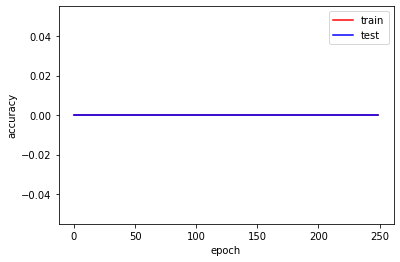

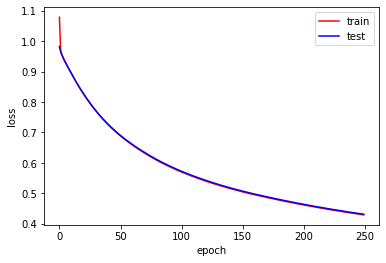

<Figure size 432x288 with 0 Axes>

In [178]:
epochsRange6 = range(250)

matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

#### Conception d'un modèle de prédiction du nombre de morts par classification

Toujours dans l'objectif de prédire le nombre de morts, on utilise désormais une autre méthode de fouille de données : la classification / le clustering. L'idée est que dans l'étude précédente par regression, à chaque fois pour comparer le nombre de morts attendu de celui préduit, nous étions obligé de comparer les valeurs par ordre de grandeur, car il était impossible de comparer les valeurs directement, les prédictions ne pouvant être exactes au chiffre près. Ainsi, en passant à de la classification dans cette deuxième étude, nous allons attribuer des classes de nombre de morts à chaque ligne / observation, ce qui permettra des comparaisons plus simples pour les tests. Les classes ayant un effet dès le départ de généralisation, chaque classe représente en fait un ordre de grandeur, un intervalle de valeur et pas une valeur précise. Et puis, pour des études de prédiction d'évolution d'épidémie prévoir de manière global avec des classes peut sembler plus intéressant.

###### Classification des observations par classes de nombres de morts

On détermine les valeurs extrêmes (min, max) pour le nombre de morts, on choisit des intervalles pour nos classes en fonction de ses valeurs, on attribue une classe à chaque ligne / observation. Nous faisons 10 classes : 
- classe 1 : 0 ;
- classe 2 : 1 à 100 ;
- classe 3 : 101 à 500 ;
- classe 4 : 501 à 1000 ;  
- classe 5 : 1001 à 2000 ;
- classe 6 : 2001 à 3000 ; 
- classe 7 : 3001 à 4000 ; 
- classe 8 : 4001 à 5000 ;
- classe 9 : 5001 à 6000 ;
- classe 10 : 6001 à 8000.

In [179]:
normalizedDataFrame['deaths'].min()

0

In [180]:
normalizedDataFrame['deaths'].max()

7886

In [397]:
normalizedDataFrame['deaths'].unique()

<IntegerArray>
[   2,  224,    1,    0,   15, 4857,    8,    6,  230,    4,
 ...
 2624, 1944, 5450, 2463, 5742, 2188, 3267, 2158, 4693, 4554]
Length: 2926, dtype: Int64

In [398]:
len(normalizedDataFrame['deaths'].unique())

2926

In [459]:
deathsModelDataFrame2 = normalizedDataFrame.copy()
deathsModelDataFrame2

,date,county_fips,state_fips,cases,deaths
140961,15894144,26035,26,14,2
431271,15977088,6001,6,15475,224
149232,15896736,18183,18,28,2
351844,15954624,30031,30,695,1
168293,15901920,47113,47,164,2
...,...,...,...,...,...
723847,16057440,35045,35,4707,211
340842,15951168,54061,54,748,5
443045,15979680,48207,48,51,1
745817,16063488,36015,36,2872,34


In [400]:
deathsModelDataFrame2['class_deaths'] = [2 
                                         if deaths >= 1 and deaths <= 100 else deaths 
                                         for deaths 
                                         in deathsModelDataFrame2['deaths']]

In [401]:
deathsModelDataFrame2['class_deaths'] = [3
                                         if deathsClass >= 101 and deathsClass <= 500
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [402]:
deathsModelDataFrame2['class_deaths'] = [4
                                         if deathsClass >= 501 and deathsClass <= 1000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [403]:
deathsModelDataFrame2['class_deaths'] = [5
                                         if deathsClass >= 1001 and deathsClass <= 2000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [404]:
deathsModelDataFrame2['class_deaths'] = [6
                                         if deathsClass >= 2001 and deathsClass <= 3000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [405]:
deathsModelDataFrame2['class_deaths'] = [7
                                         if deathsClass >= 3001 and deathsClass <= 4000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [406]:
deathsModelDataFrame2['class_deaths'] = [8
                                         if deathsClass >= 4001 and deathsClass <= 5000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [407]:
deathsModelDataFrame2['class_deaths'] = [9
                                         if deathsClass >= 5001 and deathsClass <= 6000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [408]:
deathsModelDataFrame2['class_deaths'] = [10
                                         if deathsClass >= 6001 and deathsClass <= 8000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [409]:
deathsModelDataFrame2['class_deaths'] = [1
                                         if deathsClass == 0
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']] 

In [410]:
deathsModelDataFrame2

,date,county_fips,state_fips,cases,deaths,class_deaths
140961,15894144,26035,26,14,2,2
431271,15977088,6001,6,15475,224,3
149232,15896736,18183,18,28,2,2
351844,15954624,30031,30,695,1,2
168293,15901920,47113,47,164,2,2
...,...,...,...,...,...,...
723847,16057440,35045,35,4707,211,3
340842,15951168,54061,54,748,5,2
443045,15979680,48207,48,51,1,2
745817,16063488,36015,36,2872,34,2


In [411]:
deathsModelDataFrame2['class_deaths'].unique()

array([ 2,  3,  1,  8,  4,  7,  9,  5,  6, 10], dtype=int64)

In [412]:
len(deathsModelDataFrame2['class_deaths'].unique())

10

In [413]:
deathsModelDataFrame2 = deathsModelDataFrame2[['date', 'county_fips', 'state_fips', 'cases', 'class_deaths']]

In [414]:
deathsModelDataFrame2

,date,county_fips,state_fips,cases,class_deaths
140961,15894144,26035,26,14,2
431271,15977088,6001,6,15475,3
149232,15896736,18183,18,28,2
351844,15954624,30031,30,695,2
168293,15901920,47113,47,164,2
...,...,...,...,...,...
723847,16057440,35045,35,4707,3
340842,15951168,54061,54,748,2
443045,15979680,48207,48,51,2
745817,16063488,36015,36,2872,2


###### Divisions des données pour faire les ensembles necéssaires

Comme pour le modèle précédent on produit les ensembles de données que va utiliser le modèle.

In [415]:
deathsModelForPredictionDataFrame2 = deathsModelDataFrame2.iloc[:100,]
deathsModelForPredictionDataFrame2

,date,county_fips,state_fips,cases,class_deaths
140961,15894144,26035,26,14,2
431271,15977088,6001,6,15475,3
149232,15896736,18183,18,28,2
351844,15954624,30031,30,695,2
168293,15901920,47113,47,164,2
...,...,...,...,...,...
106420,15883776,22065,22,8,1
146804,15895872,26139,26,518,2
753843,16066080,13131,13,1016,2
201533,15912288,5059,5,34,1


In [416]:
deathsModelDataFrame2 = deathsModelDataFrame2.iloc[100:,]
deathsModelDataFrame2

,date,county_fips,state_fips,cases,class_deaths
21201,15855264,51085,51,5,1
301674,15940800,18111,18,100,2
598706,16022880,69120,69,2,1
726099,16058304,20093,20,304,2
250544,15926112,26075,26,2056,2
...,...,...,...,...,...
723847,16057440,35045,35,4707,3
340842,15951168,54061,54,748,2
443045,15979680,48207,48,51,2
745817,16063488,36015,36,2872,2


In [417]:
deathsModelForPredictionEVDataFrame2 = deathsModelForPredictionDataFrame2.iloc[:,:4]
deathsModelForPredictionEVDataFrame2

,date,county_fips,state_fips,cases
140961,15894144,26035,26,14
431271,15977088,6001,6,15475
149232,15896736,18183,18,28
351844,15954624,30031,30,695
168293,15901920,47113,47,164
...,...,...,...,...
106420,15883776,22065,22,8
146804,15895872,26139,26,518
753843,16066080,13131,13,1016
201533,15912288,5059,5,34


In [418]:
deathsModelForPredictionRVDataFrame2 = deathsModelForPredictionDataFrame2.iloc[:,4:]
deathsModelForPredictionRVDataFrame2

,class_deaths
140961,2
431271,3
149232,2
351844,2
168293,2
...,...
106420,1
146804,2
753843,2
201533,1


In [419]:
deathsModelEVDataFrame2 = deathsModelDataFrame2.iloc[:,:4]
deathsModelEVDataFrame2

,date,county_fips,state_fips,cases
21201,15855264,51085,51,5
301674,15940800,18111,18,100
598706,16022880,69120,69,2
726099,16058304,20093,20,304
250544,15926112,26075,26,2056
...,...,...,...,...
723847,16057440,35045,35,4707
340842,15951168,54061,54,748
443045,15979680,48207,48,51
745817,16063488,36015,36,2872


In [420]:
deathsModelRVDataFrame2 = deathsModelDataFrame2.iloc[:,4:]
deathsModelRVDataFrame2

,class_deaths
21201,1
301674,2
598706,1
726099,2
250544,2
...,...
723847,3
340842,2
443045,2
745817,2


In [421]:
deathsModelEVTrainDataFrame2, deathsModelEVTestDataFrame2, deathsModelRVTrainDataFrame2, deathsModelRVTestDataFrame2 = train_test_split(deathsModelEVDataFrame2, deathsModelRVDataFrame2, test_size=0.25, random_state=1)

In [422]:
deathsModelEVTrainDataFrame2

,date,county_fips,state_fips,cases
661890,16040160,48073,48,1647
532851,16004736,37003,37,483
345389,15952896,27065,27,19
23949,15856992,13317,13,2
653086,16038432,1015,1,4689
...,...,...,...,...
129131,15890688,20119,20,21
503291,15996960,13107,13,879
342601,15952032,31027,31,19
220215,15917472,20133,20,4


In [423]:
deathsModelRVTrainDataFrame2

,class_deaths
661890,2
532851,2
345389,2
23949,1
653086,2
...,...
129131,1
503291,2
342601,1
220215,1


In [424]:
deathsModelEVTestDataFrame2

,date,county_fips,state_fips,cases
94174,15880320,5021,5,3
130323,15890688,42057,42,8
335885,15950304,22021,22,133
308717,15942528,31097,31,7
79193,15875136,39059,39,15
...,...,...,...,...
121213,15888096,33011,33,1308
616770,16028064,26155,26,605
523869,16002144,42079,42,3981
100176,15882048,13237,13,40


In [425]:
deathsModelRVTestDataFrame2

,class_deaths
94174,1
130323,1
335885,2
308717,1
79193,1
...,...
121213,2
616770,2
523869,3
100176,2


###### Seconde normalisation des données

Comme pour les données du modèle précédent, on effetue une seconde normalisation.

In [426]:
scalerExplanatoryVariable2 = preprocessing.StandardScaler()
encoderResultVariable = OneHotEncoder()

In [427]:
deathsModelEVTrainDataFrame2 = pandas.DataFrame(scalerExplanatoryVariable2.fit_transform(deathsModelEVTrainDataFrame2), 
                                                columns = deathsModelEVTrainDataFrame2.columns)
deathsModelEVTrainDataFrame2

,date,county_fips,state_fips,cases
0,1.207798,1.157230,1.160509,0.012588
1,0.650633,0.434050,0.441079,-0.143608
2,-0.164730,-0.215180,-0.212948,-0.205871
3,-1.673152,-1.113309,-1.128586,-0.208153
4,1.180619,-1.916973,-1.913418,0.420789
...,...,...,...,...
581429,-1.143166,-0.668948,-0.670767,-0.205603
581430,0.528328,-1.127028,-1.128586,-0.090469
581431,-0.178319,0.043650,0.048663,-0.205871
581432,-0.721895,-0.668033,-0.670767,-0.207884


In [428]:
deathsModelRVTrainDataFrame2 = pandas.DataFrame(encoderResultVariable.fit_transform(deathsModelRVTrainDataFrame2.values.reshape(-1,1)).toarray())
deathsModelRVTrainDataFrame2

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
581429,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581430,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581431,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581432,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [429]:
deathsModelEVTestDataFrame2 = pandas.DataFrame(scalerExplanatoryVariable2.fit_transform(deathsModelEVTestDataFrame2), 
                                               columns = deathsModelEVTestDataFrame2.columns)
deathsModelEVTestDataFrame2

,date,county_fips,state_fips,cases
0,-1.309477,-1.654642,-1.651244,-0.205567
1,-1.146351,0.764436,0.768371,-0.204898
2,-0.208379,-0.544254,-0.539529,-0.188170
3,-0.330723,0.048562,0.049026,-0.205032
4,-1.391040,0.568616,0.572186,-0.203961
...,...,...,...,...
193807,-1.187133,0.173579,0.179816,-0.030927
193808,1.015064,-0.274234,-0.277949,-0.125005
193809,0.607250,0.765873,0.768371,0.326785
193810,-1.282289,-1.117998,-1.128084,-0.200615


In [430]:
deathsModelRVTestDataFrame2 = pandas.DataFrame(encoderResultVariable.fit_transform(deathsModelRVTestDataFrame2.values.reshape(-1,1)).toarray())
deathsModelRVTestDataFrame2

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
193807,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193808,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193809,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193810,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Création de l'architecture du modèle

Comme pour le modèle précédent, on déclare une fonction de création du modèle,  avec cette fois-ci en sortie 10 neurones pour les 10 classes, et softmax pour avoir une probabilité pour les 10 classes.

In [451]:
def createDeathsModel21():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(128, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(10, activation='softmax')(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

###### Création et entrainement du modèle

On crée le modèle et on l'entraine avec ces paramètres : 0,1% d'apprentissage, 250 époques d'entrainement, des paquets de 252 lignes / observations.

In [452]:
deathsModel21 = createDeathsModel21()
deathsModel21.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [453]:
deathsModelHistory21 = deathsModel21.fit(deathsModelEVTrainDataFrame2, deathsModelRVTrainDataFrame2,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame2, deathsModelRVTestDataFrame2))

Epoch 1/250
2308/2308 [==============================] - 5s 2ms/step - loss: 1.5053 - accuracy: 0.5963 - val_loss: 1.0475 - val_accuracy: 0.6595
Epoch 2/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.9267 - accuracy: 0.6658 - val_loss: 0.8530 - val_accuracy: 0.6700
Epoch 3/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.8226 - accuracy: 0.6690 - val_loss: 0.7965 - val_accuracy: 0.6712
Epoch 4/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.7810 - accuracy: 0.6705 - val_loss: 0.7652 - val_accuracy: 0.6730
Epoch 5/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.7549 - accuracy: 0.6729 - val_loss: 0.7437 - val_accuracy: 0.6756
Epoch 6/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.7362 - accuracy: 0.6752 - val_loss: 0.7277 - val_accuracy: 0.6778
Epoch 7/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.7219 - accuracy: 0.6773 - val_loss: 0.7151 - val_ac

2308/2308 [==============================] - 5s 2ms/step - loss: 0.5619 - accuracy: 0.7233 - val_loss: 0.5605 - val_accuracy: 0.7233
Epoch 58/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5604 - accuracy: 0.7239 - val_loss: 0.5588 - val_accuracy: 0.7240
Epoch 59/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5588 - accuracy: 0.7246 - val_loss: 0.5573 - val_accuracy: 0.7242
Epoch 60/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5573 - accuracy: 0.7251 - val_loss: 0.5558 - val_accuracy: 0.7251
Epoch 61/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5558 - accuracy: 0.7260 - val_loss: 0.5543 - val_accuracy: 0.7255
Epoch 62/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5543 - accuracy: 0.7265 - val_loss: 0.5529 - val_accuracy: 0.7263
Epoch 63/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.5528 - accuracy: 0.7272 - val_loss: 0.5514 - val_accuracy

2308/2308 [==============================] - 4s 2ms/step - loss: 0.4985 - accuracy: 0.7609 - val_loss: 0.4982 - val_accuracy: 0.7571
Epoch 114/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4977 - accuracy: 0.7614 - val_loss: 0.4973 - val_accuracy: 0.7585
Epoch 115/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4969 - accuracy: 0.7621 - val_loss: 0.4966 - val_accuracy: 0.7585
Epoch 116/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4961 - accuracy: 0.7628 - val_loss: 0.4958 - val_accuracy: 0.7591
Epoch 117/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4954 - accuracy: 0.7630 - val_loss: 0.4950 - val_accuracy: 0.7601
Epoch 118/250
2308/2308 [==============================] - 3s 1ms/step - loss: 0.4946 - accuracy: 0.7638 - val_loss: 0.4943 - val_accuracy: 0.7608
Epoch 119/250
2308/2308 [==============================] - 3s 2ms/step - loss: 0.4939 - accuracy: 0.7644 - val_loss: 0.4936 - val_ac

Epoch 169/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4653 - accuracy: 0.7955 - val_loss: 0.4657 - val_accuracy: 0.7890
Epoch 170/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4648 - accuracy: 0.7962 - val_loss: 0.4652 - val_accuracy: 0.7897
Epoch 171/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4644 - accuracy: 0.7969 - val_loss: 0.4646 - val_accuracy: 0.7895
Epoch 172/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4640 - accuracy: 0.7968 - val_loss: 0.4643 - val_accuracy: 0.7933
Epoch 173/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4635 - accuracy: 0.7972 - val_loss: 0.4639 - val_accuracy: 0.7909
Epoch 174/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4631 - accuracy: 0.7977 - val_loss: 0.4637 - val_accuracy: 0.7922
Epoch 175/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4627 - accuracy: 0.7980 - val_loss: 0

Epoch 225/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4463 - accuracy: 0.8073 - val_loss: 0.4477 - val_accuracy: 0.8090
Epoch 226/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4460 - accuracy: 0.8074 - val_loss: 0.4477 - val_accuracy: 0.8078
Epoch 227/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4458 - accuracy: 0.8077 - val_loss: 0.4473 - val_accuracy: 0.8086
Epoch 228/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4455 - accuracy: 0.8079 - val_loss: 0.4470 - val_accuracy: 0.8088
Epoch 229/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4453 - accuracy: 0.8078 - val_loss: 0.4466 - val_accuracy: 0.8078
Epoch 230/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4450 - accuracy: 0.8080 - val_loss: 0.4462 - val_accuracy: 0.8089
Epoch 231/250
2308/2308 [==============================] - 4s 2ms/step - loss: 0.4448 - accuracy: 0.8080 - val_loss: 0

##### Test manuel de la justesse de prédiction du modèle

Comme pour le modèle précédent, on teste notre modèle par classification d'abord avec un test manuel. On touve un taux de mal-classification souvent autour de 20% - 25%, cela reste correct.

<b>Pour conclure : les résultats du test manuel sont plutôt concluant pour ce modèle.</b>

In [454]:
deathsModelPredictions21 = deathsModel21.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame2))
comparisonResultAndPredictionDataFrame21 = deathsModelForPredictionRVDataFrame2.copy()
comparisonResultAndPredictionDataFrame21['predicted_class_deaths'] = encoderResultVariable.inverse_transform(deathsModelPredictions21)
print(comparisonResultAndPredictionDataFrame21.to_string())

        class_deaths  predicted_class_deaths
140961             2                       1
431271             3                       3
149232             2                       1
351844             2                       2
168293             2                       2
159079             1                       2
140256             2                       2
663777             2                       2
366356             8                       5
207301             2                       2
13475              1                       1
648414             2                       2
335810             3                       3
458682             1                       1
602385             2                       2
244525             1                       1
133476             1                       1
228168             1                       1
423886             2                       2
4062               1                       1
518193             2                       2
3427      

In [456]:
(len(comparisonResultAndPredictionDataFrame21[comparisonResultAndPredictionDataFrame21['class_deaths'] == 
                                           comparisonResultAndPredictionDataFrame21['predicted_class_deaths']]) / 
len(comparisonResultAndPredictionDataFrame21))

0.76

In [457]:
(len(comparisonResultAndPredictionDataFrame21[comparisonResultAndPredictionDataFrame21['class_deaths'] != 
                                           comparisonResultAndPredictionDataFrame21['predicted_class_deaths']]) / 
len(comparisonResultAndPredictionDataFrame21))

0.24

###### Etude du modèle avec des graphiques

Comme pour le modèle précédent, on étudie la qualité de notre modèle avec des garphiques des résultats d'entrainement et de test du modèle. Le loss trouvé est correct, et il ne prend pas trop de temps pour converger.

<b>Pour conclure : ce modèle est assez concluant.</b>

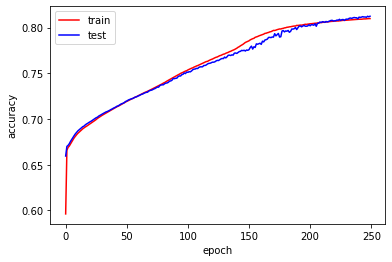

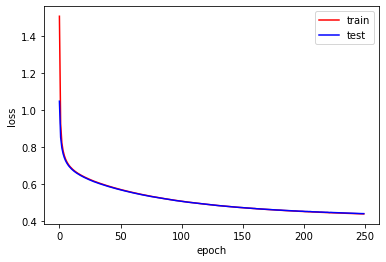

<Figure size 432x288 with 0 Axes>

In [458]:
epochsRange21 = range(250)

matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()